In [4]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

xr.set_options(keep_attrs=True, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

%xmode minimal
%matplotlib inline
%config InlineBackend.figure_format='retina'

Exception reporting mode: Minimal


Reference: https://tutorial.xarray.dev/overview/xarray-in-45-min.html

In [5]:
# ds = xr.tutorial.load_dataset("air_temperature", mask_and_scale=False)
ds = xr.tutorial.load_dataset("air_temperature")
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [6]:
# Dot notation works if variable names don't clash with methods
ds.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [7]:
# Data array
da = ds.air
da.name

'air'

In [8]:
# Named dimensions
da.dims

('time', 'lat', 'lon')

In [9]:
# Coordinate variables
da.coords

Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

In [10]:
# Coordinate indexing is also possible with dot notation
da.lat

<xarray.DataArray 'lat' (lat: 25)>
75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 ... 30.0 27.5 25.0 22.5 20.0 17.5 15.0
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [11]:
# Alternate accessor
# Coordinate locations on a grid at which we have data
da.coords['lat']

<xarray.DataArray 'lat' (lat: 25)>
75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 ... 30.0 27.5 25.0 22.5 20.0 17.5 15.0
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [12]:
da.attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': 2,
 'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32)}

In [13]:
# assign your own attributes!
da.attrs["who_is_awesome"] = "xarray"
da.attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': 2,
 'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32),
 'who_is_awesome': 'xarray'}

In [14]:
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

In [15]:
# .data contains the numpy array storing air temperature values.
da.data

array([[[241.2    , 242.5    , ..., 235.5    , 238.59999],
        [243.79999, 244.5    , ..., 235.29999, 239.29999],
        ...,
        [295.9    , 296.19998, ..., 295.9    , 295.19998],
        [296.29   , 296.79   , ..., 296.79   , 296.6    ]],

       [[242.09999, 242.7    , ..., 233.59999, 235.79999],
        [243.59999, 244.09999, ..., 232.5    , 235.7    ],
        ...,
        [296.19998, 296.69998, ..., 295.5    , 295.1    ],
        [296.29   , 297.19998, ..., 296.4    , 296.6    ]],

       ...,

       [[245.79   , 244.79   , ..., 243.98999, 244.79   ],
        [249.89   , 249.29   , ..., 242.48999, 244.29   ],
        ...,
        [296.29   , 297.19   , ..., 295.09   , 294.38998],
        [297.79   , 298.38998, ..., 295.49   , 295.19   ]],

       [[245.09   , 244.29   , ..., 241.48999, 241.79   ],
        [249.89   , 249.29   , ..., 240.29   , 241.68999],
        ...,
        [296.09   , 296.88998, ..., 295.69   , 295.19   ],
        [297.69   , 298.09   , ..., 296.19  

In [16]:
type(da.data)

numpy.ndarray

# Analysis without xarray    

In [17]:
# plot the first timestep
lat = ds.air.lat.data  # numpy array
lon = ds.air.lon.data  # numpy array
temp = ds.air.data  # numpy array

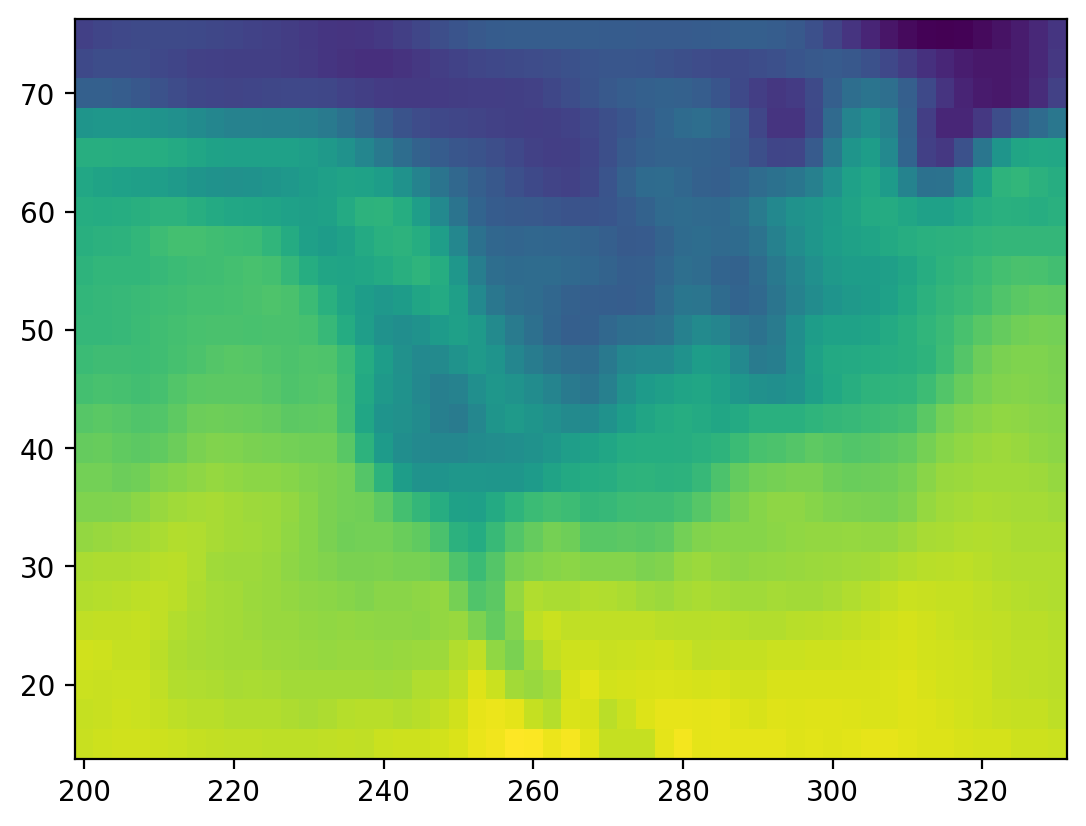

In [18]:
plt.figure()
plt.pcolormesh(lon, lat, temp[0, :, :]);

In [19]:
temp.mean(axis=1)  ## what did I just do? I can't tell by looking at this line.

array([[279.39798, 279.6664 , ..., 280.31522, 280.6624 ],
       [279.05722, 279.538  , ..., 280.27002, 280.79764],
       ...,
       [279.398  , 279.66602, ..., 280.34198, 280.834  ],
       [279.27   , 279.354  , ..., 279.96997, 280.48196]], dtype=float32)

# Analysis with xarray

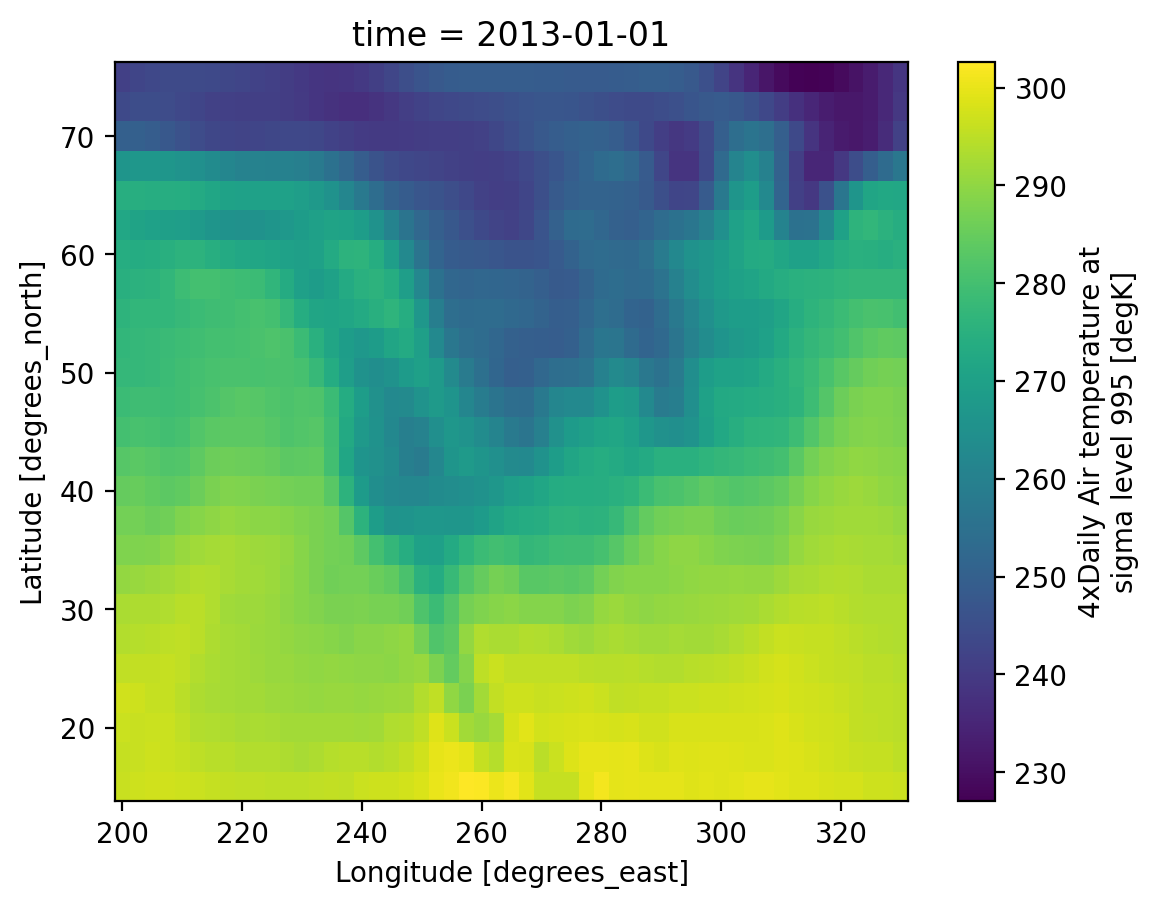

In [20]:
ds.air.isel(time=0).plot(x="lon");

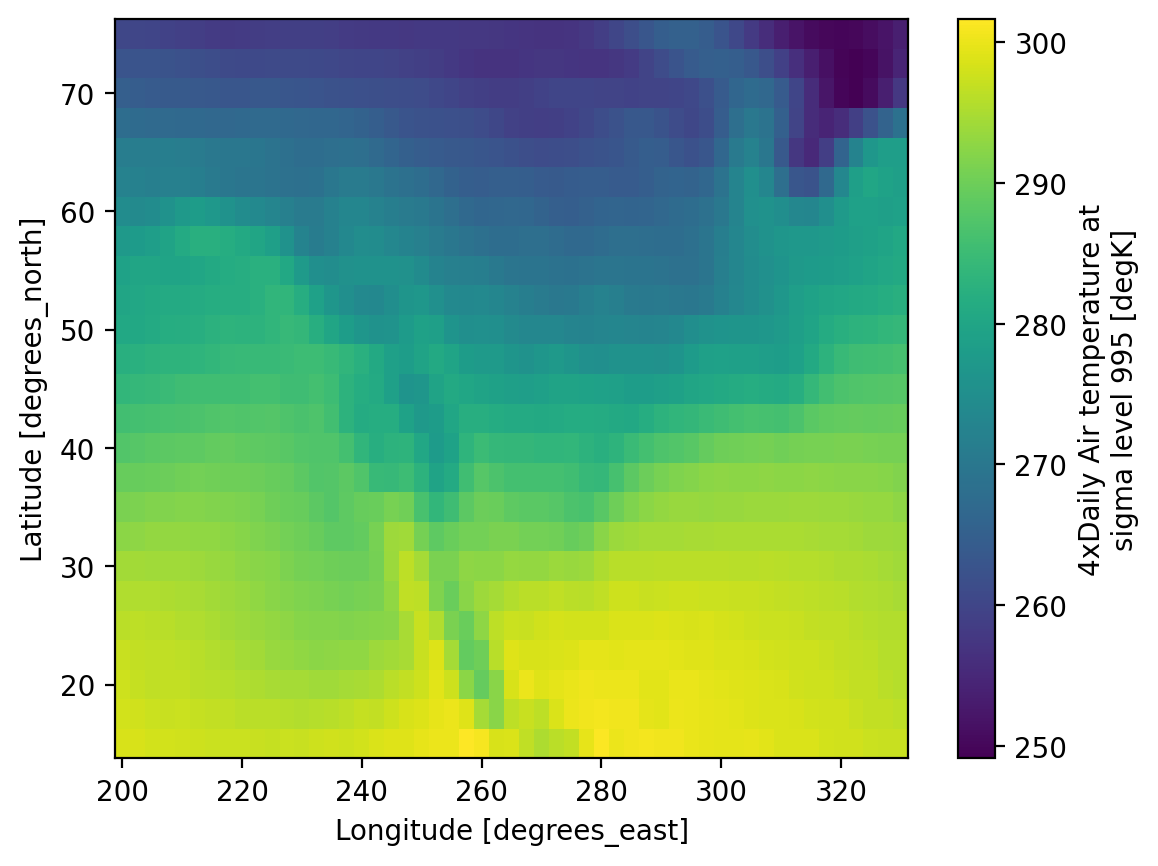

In [21]:
ds.air.mean(dim="time").plot(x='lon');

# Label based indexing

In [22]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [20]:
# Pull out data for all of May 2013
ds.sel(time='2013-05')

<xarray.Dataset>
Dimensions:  (lat: 25, time: 124, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-05-01 ... 2013-05-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 259.2 259.3 259.1 ... 298.2 297.6 297.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [21]:
# demonstrate slicing
ds.sel(time=slice('2013-05', '2013-07'))

<xarray.Dataset>
Dimensions:  (lat: 25, time: 368, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-05-01 ... 2013-07-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 259.2 259.3 259.1 ... 299.4 299.5 299.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [22]:
ds.sel(time='2013')

<xarray.Dataset>
Dimensions:  (lat: 25, time: 1460, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.1 295.1 294.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [23]:
# Demonstrate nearest indexing
ds.sel(lon='240.2', method="nearest")

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
    lon      float32 240.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat) float32 239.6 237.2 240.1 249.0 ... 294.8 296.9 298.4
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [24]:
# Nearest indexing at multiple points
ds.sel(lon = ['240.2', '209'], lat = ['10', '20'], method='nearest')

<xarray.Dataset>
Dimensions:  (lat: 2, time: 2920, lon: 2)
Coordinates:
  * lat      (lat) float32 15.0 20.0
  * lon      (lon) float32 240.0 210.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 296.4 296.9 291.8 ... 298.9 294.8 297.3
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [25]:
# "nearest indexing at multiple points"
ds.sel(lon=[240.125, 234], lat=[40.3, 50.3], method="nearest")

<xarray.Dataset>
Dimensions:  (lat: 2, time: 2920, lon: 2)
Coordinates:
  * lat      (lat) float32 40.0 50.0
  * lon      (lon) float32 240.0 235.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 268.1 283.0 265.5 ... 285.2 256.8 268.6
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [26]:
ds.air.data[0, 2, 3]

247.5

In [27]:
ds.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

In [28]:
# pull out time index 0, lat index 2, and lon index 3
ds.air.isel(time=0, lat=2, lon=3)  #  much better than ds.air[0, 2, 3]

<xarray.DataArray 'air' ()>
247.5
Coordinates:
    lat      float32 70.0
    lon      float32 207.5
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

In [29]:
ds.air[0,2,3]

<xarray.DataArray 'air' ()>
247.5
Coordinates:
    lat      float32 70.0
    lon      float32 207.5
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

In [30]:
# demonstrate slicing
ds.air.isel(lat=slice(10), lon=slice(10))

<xarray.DataArray 'air' (time: 2920, lat: 10, lon: 10)>
241.2 242.5 243.5 244.0 244.1 243.9 ... 278.4 279.7 281.3 281.9 281.8 282.3
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 215.0 217.5 220.0 222.5
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

In [31]:
# Earth's average radius in meters
R = 6.371e6

# Coordinate spacing for this dataset is 2.5 x 2.5 degrees
dϕ = np.deg2rad(2.5)
dλ = np.deg2rad(2.5)

dlat = R * dϕ * xr.ones_like(ds.air.lon)
dlon = R * dλ * np.cos(np.deg2rad(ds.air.lat))
dlon.name = "dlon"
dlat.name = "dlat"

In [32]:
dlon

<xarray.DataArray 'dlon' (lat: 25)>
7.195e+04 8.359e+04 9.508e+04 1.064e+05 ... 2.612e+05 2.651e+05 2.685e+05
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [33]:
dλ

0.04363323129985824

There are two concepts here:

you can call functions like np.cos and np.deg2rad (“numpy ufuncs”) on Xarray objects and receive an Xarray object back.

We used ones_like to create a DataArray that looks like ds.air.lon in all respects, except that the data are all ones

In [34]:
# returns an xarray DataArray!
np.cos(np.deg2rad(ds.lat))

<xarray.DataArray 'lat' (lat: 25)>
0.2588 0.3007 0.342 0.3827 0.4226 0.4617 ... 0.9063 0.9239 0.9397 0.9537 0.9659
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [35]:
ds.lat

<xarray.DataArray 'lat' (lat: 25)>
75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 ... 30.0 27.5 25.0 22.5 20.0 17.5 15.0
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [36]:
# cell latitude length is constant with longitude
dlat

<xarray.DataArray 'dlat' (lon: 53)>
2.78e+05 2.78e+05 2.78e+05 2.78e+05 ... 2.78e+05 2.78e+05 2.78e+05 2.78e+05
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

In [37]:
# cell longitude length changes with latitude
dlon

<xarray.DataArray 'dlon' (lat: 25)>
7.195e+04 8.359e+04 9.508e+04 1.064e+05 ... 2.612e+05 2.651e+05 2.685e+05
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

# Broadcasting: expanding data
Our longitude and latitude length DataArrays are both 1D with different dimension names. If we multiple these DataArrays together the dimensionality is expanded to 2D by broadcasting:

In [38]:
cell_area = dlon * dlat
cell_area

<xarray.DataArray (lat: 25, lon: 53)>
2e+10 2e+10 2e+10 2e+10 2e+10 ... 7.464e+10 7.464e+10 7.464e+10 7.464e+10
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [39]:
dlon.shape

(25,)

In [40]:
dlat.shape

(53,)

In [41]:
cell_area.shape

(25, 53)

In [42]:
np.arange(3)

array([0, 1, 2])

In [43]:
np.arange(3).reshape(3, 1)

array([[0],
       [1],
       [2]])

In [44]:
np.arange(3).reshape(3, 1) + np.arange(3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

# Alignment

In [45]:
ds.air.isel(time=1) / cell_area

<xarray.DataArray (lat: 25, lon: 53)>
1.21e-08 1.213e-08 1.215e-08 1.217e-08 ... 3.971e-09 3.971e-09 3.974e-09
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01T06:00:00
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

In [46]:
# make a copy of cell_area
# then add 1e-5 degrees to latitude
cell_area_bad = cell_area.copy(deep=True)
cell_area_bad["lat"] = cell_area.lat + 1e-5  # latitudes are off by 1e-5 degrees!
cell_area_bad

<xarray.DataArray (lat: 25, lon: 53)>
2e+10 2e+10 2e+10 2e+10 2e+10 ... 7.464e+10 7.464e+10 7.464e+10 7.464e+10
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [47]:
cell_area_bad * ds.air.isel(time=1)

<xarray.DataArray (lat: 0, lon: 53)>

Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * lat      (lat) float32 
    time     datetime64[ns] 2013-01-01T06:00:00
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [48]:
# The result is an empty array with no latitude coordinates because none of them were aligned!
ds.air.isel(time=1)/cell_area_bad

<xarray.DataArray (lat: 0, lon: 53)>

Coordinates:
  * lat      (lat) float32 
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01T06:00:00
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

In [49]:
# To make sure variables are aligned:
# xr.align(cell_area_bad, ds.air, join="exact")

ValueError: cannot align objects with join='exact' where index/labels/sizes are not equal along these coordinates (dimensions): 'lat' ('lat',)

In [50]:
xr.align(cell_area, ds.air, join="exact")

(<xarray.DataArray (lat: 25, lon: 53)>
 2e+10 2e+10 2e+10 2e+10 2e+10 ... 7.464e+10 7.464e+10 7.464e+10 7.464e+10
 Coordinates:
   * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
   * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
 Attributes:
     standard_name:  latitude
     long_name:      Latitude
     units:          degrees_north
     axis:           Y,
 <xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
 241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
 Coordinates:
   * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
   * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
   * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
 Attributes:
     long_name:       4xDaily Air temperature at sigma level 995
     units:           degK
     precision:       2
     GRIB_id:         11
     GRIB_name:       TMP
     var_desc:   

# High level computation

In [51]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

## groupby

In [52]:
# seasonal groups
ds.groupby("time.season")

DatasetGroupBy, grouped over 'season'
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

In [53]:
# make a seasonal mean
seasonal_mean = ds.groupby("time.season").mean()

In [54]:
seasonal_mean = seasonal_mean.sel(season=["DJF", "MAM", "JJA", "SON"])
seasonal_mean

<xarray.Dataset>
Dimensions:  (lat: 25, season: 4, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * season   (season) object 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    air      (season, lat, lon) float32 247.0 247.0 246.7 ... 299.4 299.4 299.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

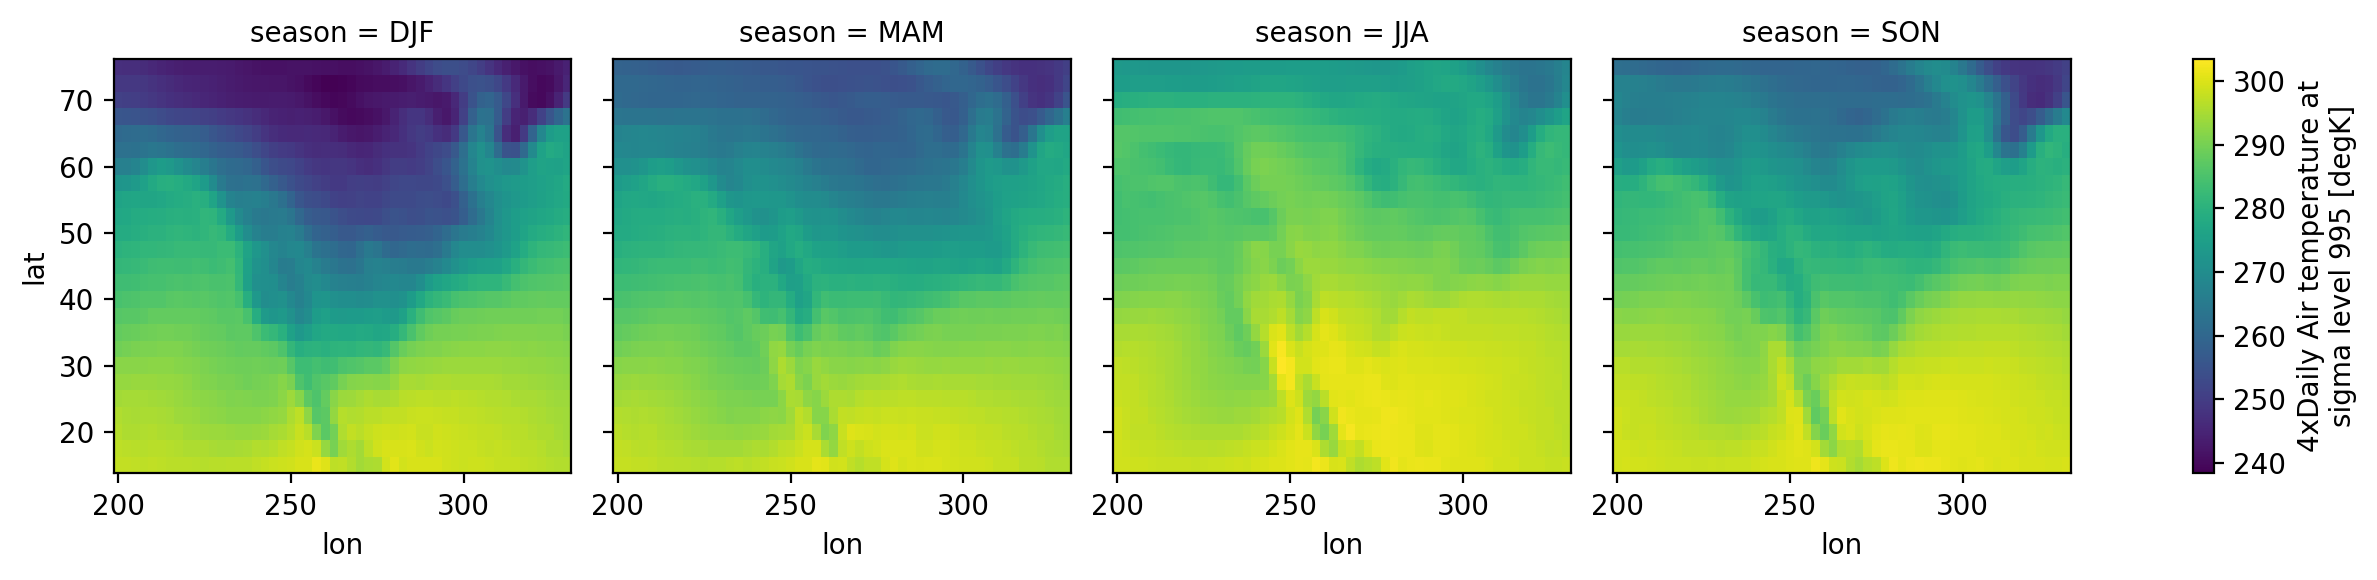

In [55]:
seasonal_mean.air.plot(col="season");

## resample

In [56]:
# resample to monthly frequency
ds.resample(time="M").mean()

<xarray.Dataset>
Dimensions:  (lat: 25, time: 24, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-31 2013-02-28 ... 2014-12-31
Data variables:
    air      (time, lat, lon) float32 244.5 244.7 244.7 ... 297.7 297.7 297.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

## weighted

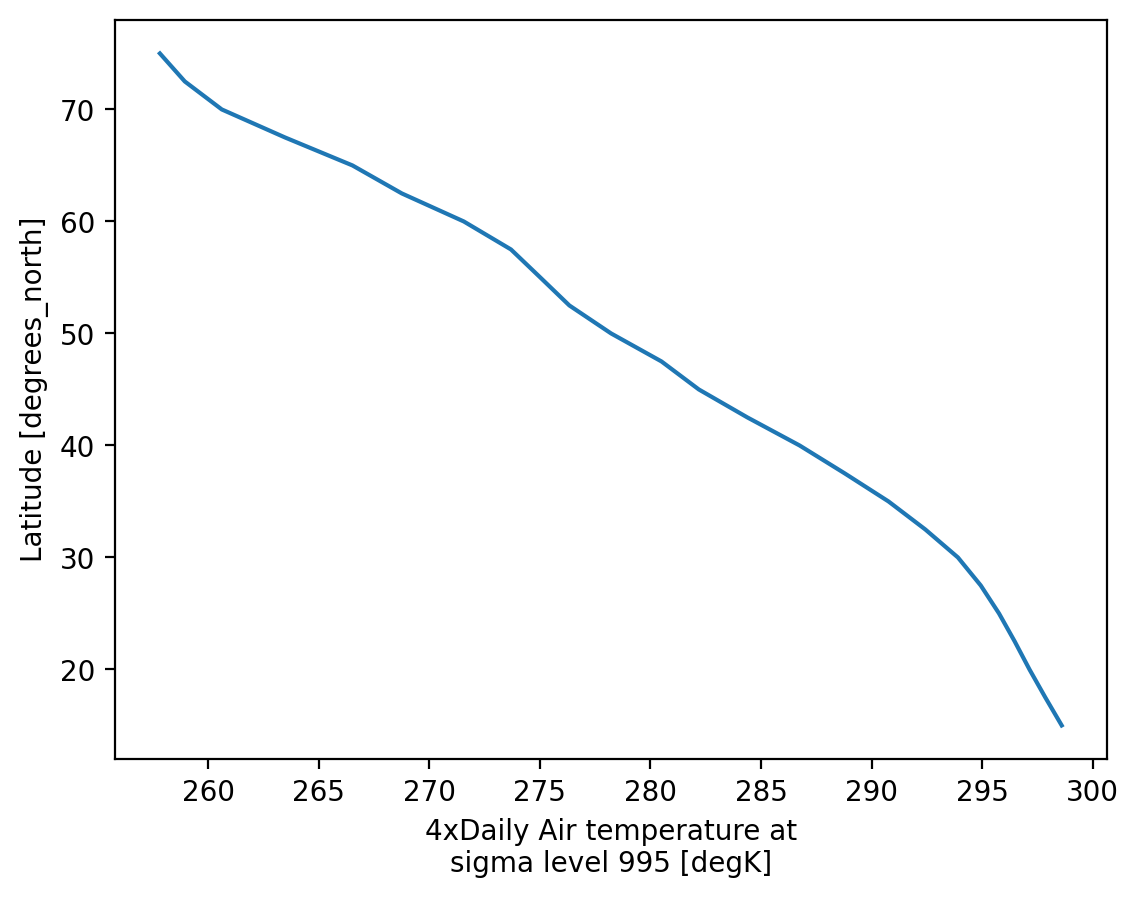

In [57]:
# weight by cell_area and take mean over (time, lon)
ds.weighted(cell_area).mean(["lon", "time"]).air.plot(y="lat");

In [58]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

# Visualisation

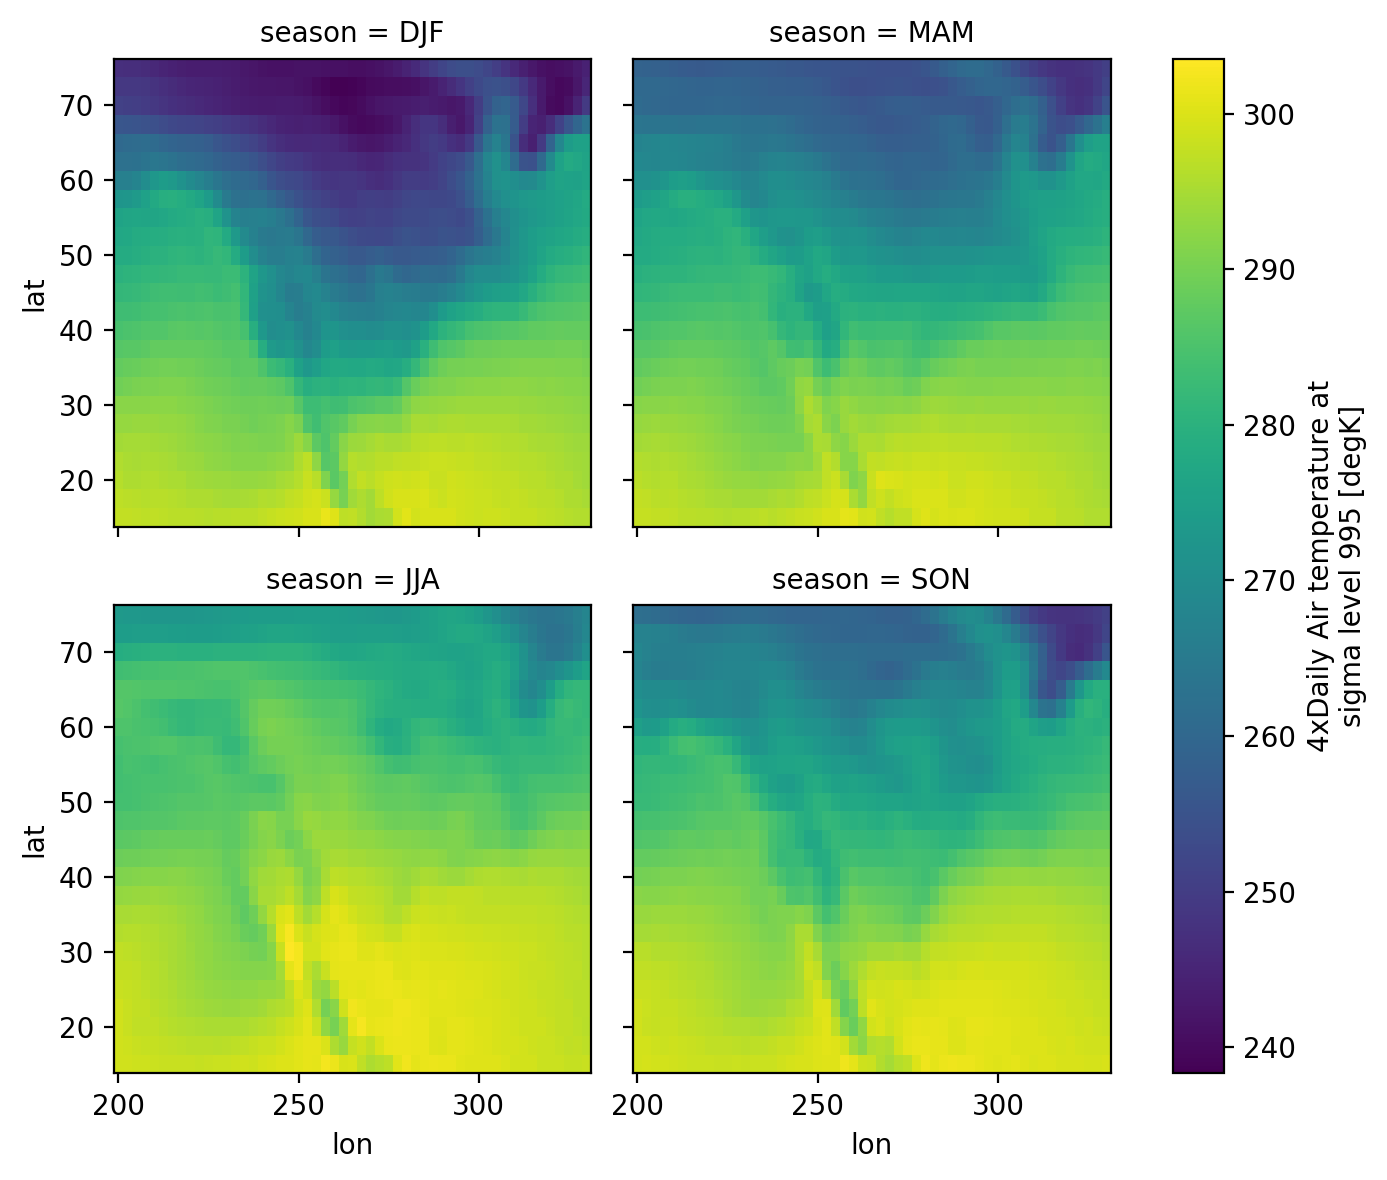

In [59]:
# Facet the seasonal mean
seasonal_mean.air.plot(col = "season", col_wrap=2);

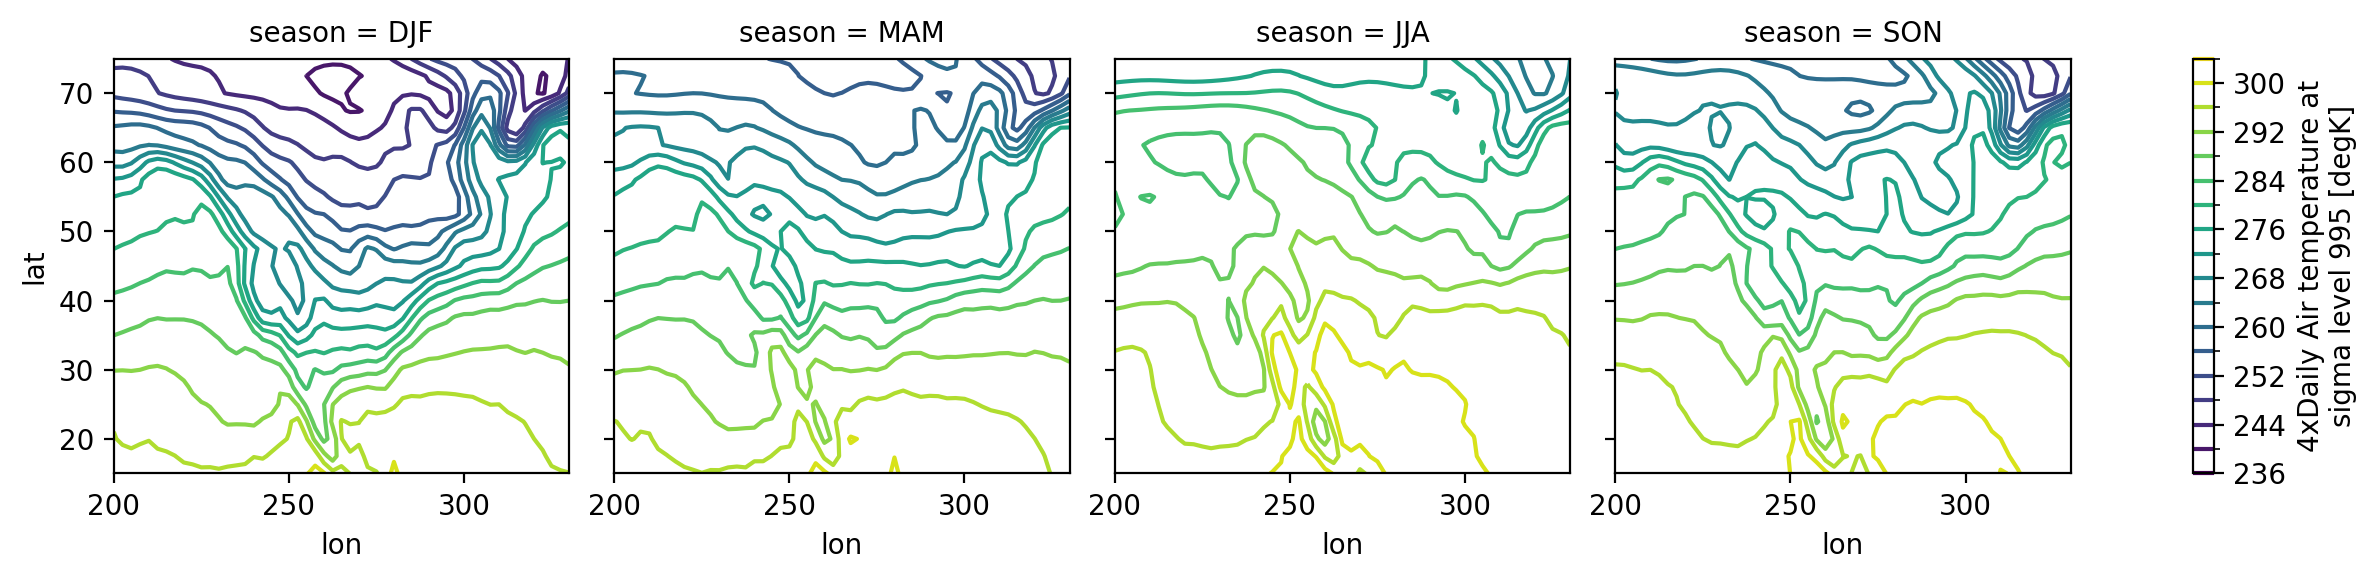

In [60]:
# contours
seasonal_mean.air.plot.contour(col="season", levels=20, add_colorbar=True);

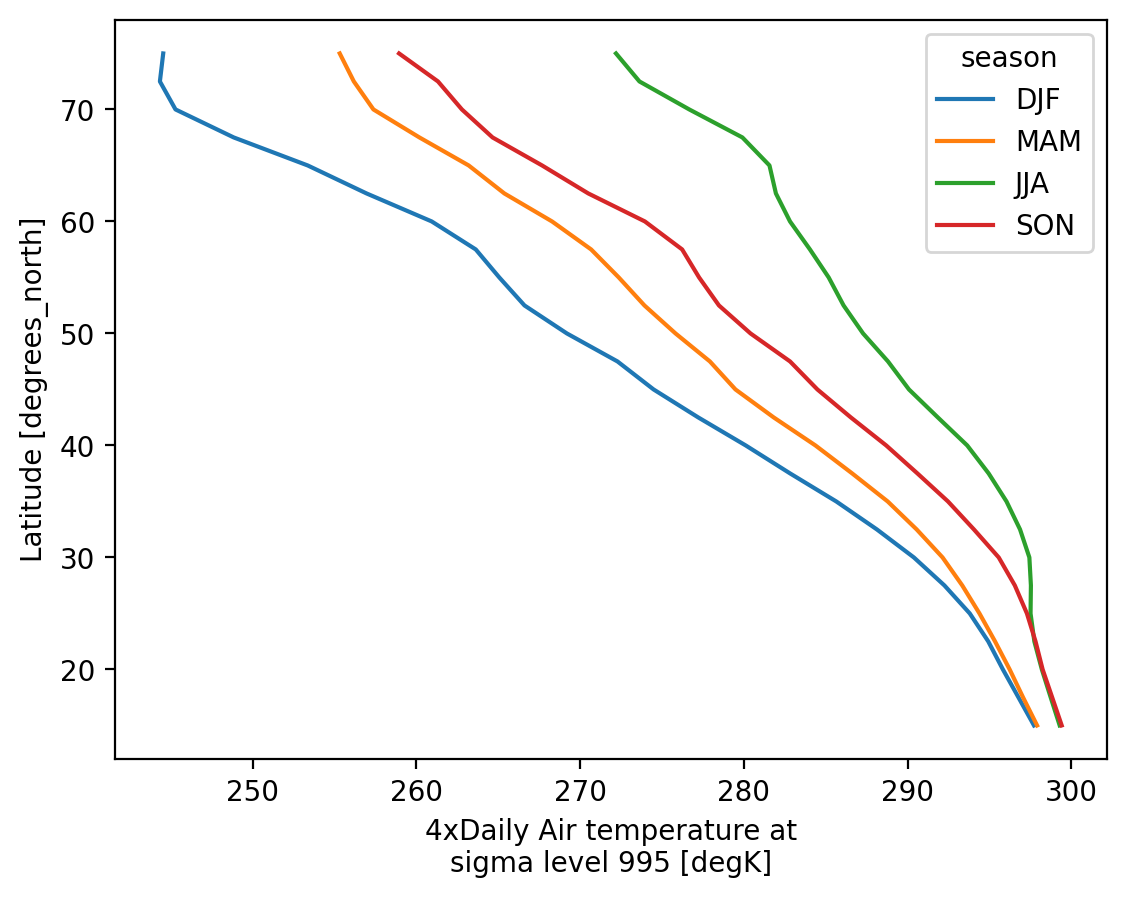

In [61]:
# line plots too? wut
seasonal_mean.air.mean("lon").plot.line(hue="season", y="lat");

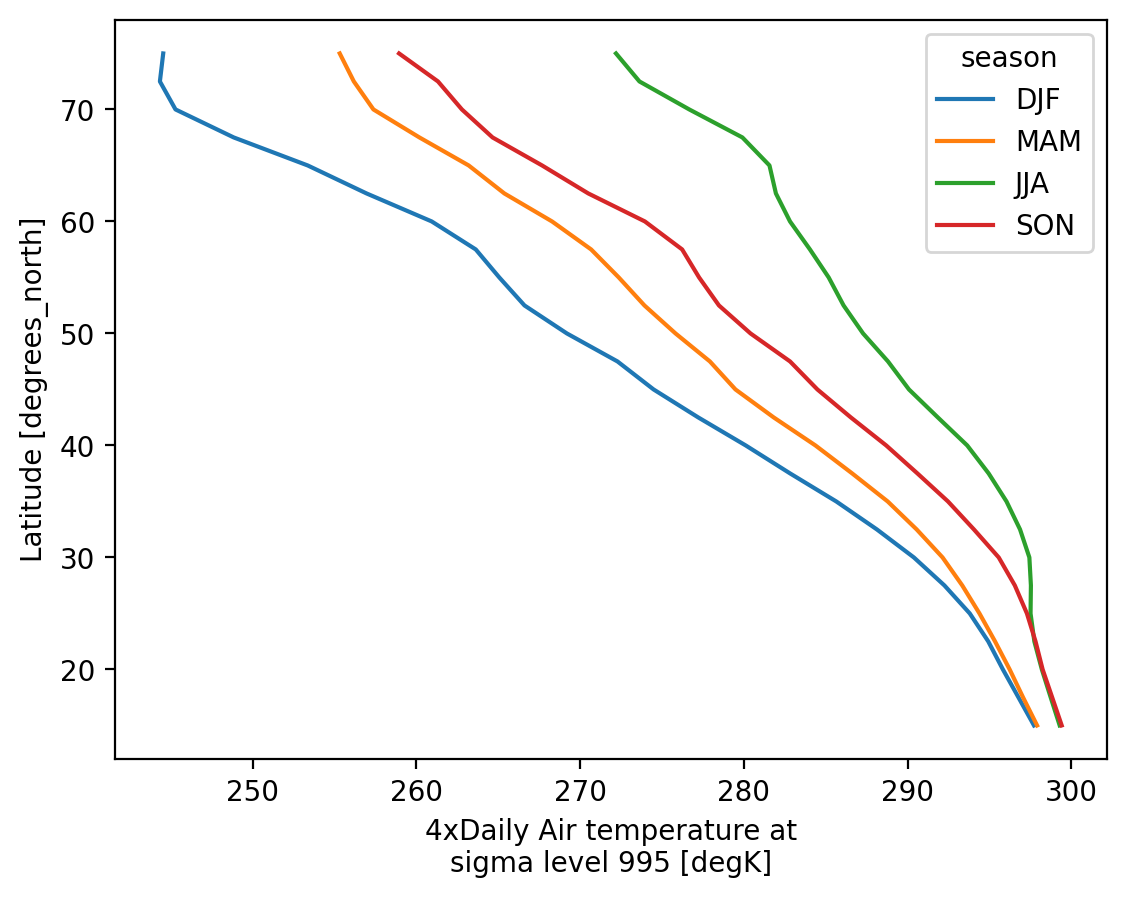

In [66]:
# line plots too? wut
(seasonal_mean.air
    .mean("lon")
    .plot.line(hue="season", y="lat")
);

In [75]:
# write to netCDF
ds.to_netcdf("my-example-dataset.nc", encoding=dict(air={"_FillValue":-9999}))

In [77]:
# help(ds.to_netcdf)

In [78]:
# read from disk
fromdisk = xr.open_dataset("my-example-dataset.nc")
fromdisk

<xarray.Dataset>
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [79]:
# check that the two are identical
ds.identical(fromdisk)

True

## Pandas

In [80]:
# convert to pandas dataframe
df = ds.isel(time=slice(10)).to_dataframe()
df

air
lat  time                lon              
75.0 2013-01-01 00:00:00 200.0  241.199997
                         202.5  242.500000
                         205.0  243.500000
                         207.5  244.000000
                         210.0  244.099991
...                                    ...
15.0 2013-01-03 06:00:00 320.0  297.000000
                         322.5  297.290009
                         325.0  296.899994
                         327.5  296.790009
                         330.0  297.100006

[13250 rows x 1 columns]

In [81]:
# convert dataframe to xarray
df.to_xarray()

<xarray.Dataset>
Dimensions:  (lat: 25, time: 10, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-01-03T06:00:00
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Data variables:
    air      (lat, time, lon) float32 241.2 242.5 243.5 ... 296.9 296.8 297.1

## Holoviz

In [82]:
import hvplot.xarray

ds.air.hvplot(groupby="time", clim=(270, 300), widget_location='bottom')

ModuleNotFoundError: No module named 'hvplot'